<a href="https://colab.research.google.com/github/mariablitkina/machine_learning/blob/main/ML1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Автострахование*





## Компания поделилась своими ежегодными данными о страховании автомобилей. Нужно выяснить реальное поведение клиентов по данным (получит ли пользователь страховку?)

##Разведочный анализ

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns
import sklearn

##Загружаем данные


In [7]:
url = "https://raw.githubusercontent.com/gordushha/ML-2022/main/Car_Insurance_Claim.csv"
data_raw = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной квартире) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [ ]:
data_raw.shape

(10000, 19)

В таблице содержатся данные о 10000 клиентах, разделенные на 19 категорий:

In [8]:
data_raw

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


Метод `data_raw.head()` отображает первые строки (по умолчанию, 5 строк) таблицы

In [9]:
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Последние строки:

In [10]:
data_raw.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [11]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Мы видим, что столбцы (признаки) имеют имена

` ID` -  идентификатор водителя (числовой)

` AGE` - возраст клиента (категориальный)

`GENDER` - пол клиента (категориальный)


`RACE` - раса (категориальный)

`DRIVING_EXPERIENCE` - стаж вождения клиента (категориальный)

`EDUCATION` - образование (категориальный)

`INCOME` - уровень дохода (категориальный)

`CREDIT_SCORE`	 - кредитный рейтинг(числовой)

`VEHICLE_OWNERSHIP` - владение транспортным средством (числовой)

`VEHICLE_YEAR` - год выпуска транспортного средства(категориальный)

`MARRIED`- семейное положение (числовой)

`CHILDREN` - наличие детей (числовой)

`POSTAL_CODE` - почтовый индекс (числовой)

`ANNUAL_MILEAGE` - пробег автомобиля (числовой)

`VEHICLE_TYPE` - тип транспортного средства (категориальный)

`SPEEDING_VIOLATIONS` - штрафы за превышение скорости (числовой)

`DUIS` - вождение в нетрезвом виде (числовой)

`PAST_ACCIDENTS`- аварии (числовой)

`OUTCOME` - результат выдачи страховки (числовой)

Заменим тип 'object' на специальный, предназначенный для хранения категориальных значений:

In [12]:
data_raw_1 = data_raw.copy()
data_raw['AGE'] = data_raw['AGE'].astype('category')
data_raw['GENDER'] = data_raw['GENDER'].astype('category')
data_raw['RACE'] = data_raw['RACE'].astype('category')
data_raw['DRIVING_EXPERIENCE'] = data_raw['DRIVING_EXPERIENCE'].astype('category')
data_raw['EDUCATION'] = data_raw['EDUCATION'].astype('category')
data_raw['INCOME'] = data_raw['INCOME'].astype('category')
data_raw['VEHICLE_YEAR'] = data_raw['VEHICLE_YEAR'].astype('category')
data_raw['VEHICLE_TYPE'] = data_raw['VEHICLE_TYPE'].astype('category')


In [13]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

## Визуализация и описательная статистика

Сводную информацию о признаках можем получить, вызвав метод `describe`:

In [14]:
data_raw.describe()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.
По умолчанию этот метод дает информацию только о количественных признаках.
Получим информацию о категориальных:

In [15]:
data_raw.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Видим, что большинство клиентов, запрашивающих страховку ранее не имели нарушений ПДД. Максимальный кредитный рейтинг равен 0.96. Преобладает маленький водительский стаж (0-9), в основном за страховкой обратились люди в возрасте 26-39 лет, большинство обративщихся за страховкой  - женщины. Обратившиеся в основном закончили старшую школу и имеют высокий уровень доходов.

### Матрица корреляции:

In [16]:
corr_mat = data_raw_1.corr()
corr_mat

<ipython-input-16-91cc1da4ec06>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = data_raw_1.corr()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

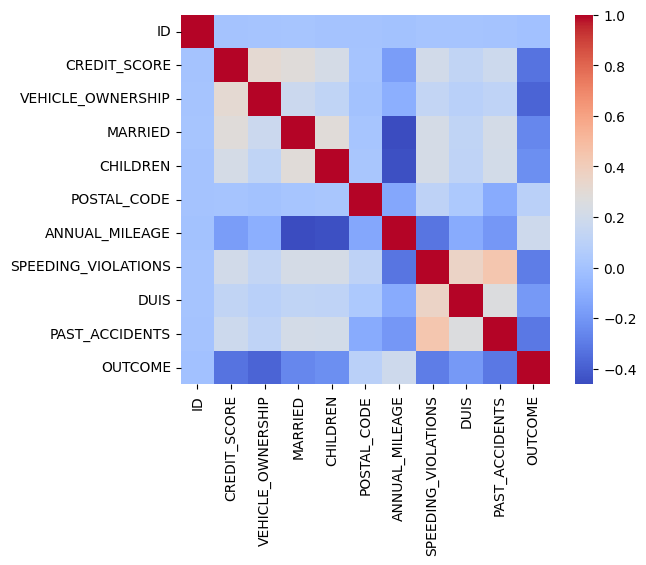

In [17]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [18]:
corr_mat >= 0.4

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,True,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,True,False,False,False,False,False,False,False,False,False
VEHICLE_OWNERSHIP,False,False,True,False,False,False,False,False,False,False,False
MARRIED,False,False,False,True,False,False,False,False,False,False,False
CHILDREN,False,False,False,False,True,False,False,False,False,False,False
POSTAL_CODE,False,False,False,False,False,True,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,False,False,False,True,False,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,False,True,False,True,False
DUIS,False,False,False,False,False,False,False,False,True,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,True,False,True,False


Положительная корреляция существует, когда одна переменная уменьшается по мере уменьшения другой переменной или одна переменная увеличивается по мере увеличения другой.Видим, что с признаком `DUIS`  связаны признаки `SPEEDING_VIOLATIONS`и `PAST_ACCIDENTS`, потому что  вождение в нетрезвом виде увеличивает вероятность превышения скорости и создания аварийных ситуаций.

In [19]:
corr_mat.where(np.triu(corr_mat >= 0.35, k=1)).stack().sort_values(ascending=False)

SPEEDING_VIOLATIONS  PAST_ACCIDENTS    0.443074
                     DUIS              0.359838
dtype: float64

In [20]:
corr_mat <= -0.3


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,False,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,False,False,False,False,False,False,False,False,False,True
VEHICLE_OWNERSHIP,False,False,False,False,False,False,False,False,False,False,True
MARRIED,False,False,False,False,False,False,True,False,False,False,False
CHILDREN,False,False,False,False,False,False,True,False,False,False,False
POSTAL_CODE,False,False,False,False,False,False,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,True,True,False,False,True,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,True,False,False,False,False
DUIS,False,False,False,False,False,False,False,False,False,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,False,False,False,True


Некоторые виды коэффициентов корреляции могут быть положительными или отрицательными.Отрицательная корреляция — корреляция, при которой увеличение одной переменной связано с уменьшением другой. Мы видим взаимосвязь признаков `PAST_ACCIDENTS` и `OUTCOME`: компании не выгодно выдавать страховку водителям, которые часто попадают в аварии. Так же можно проследить обратную связь признаков `SPEEDING_VIOLATIONS` и `CHILDREN`: люди, у которых есть дети водят аккуратнее.

In [21]:
corr_mat.where(np.triu(corr_mat <= -0.3, k=1)).stack().sort_values(ascending=False)

PAST_ACCIDENTS     OUTCOME               -0.311495
ANNUAL_MILEAGE     SPEEDING_VIOLATIONS   -0.323547
CREDIT_SCORE       OUTCOME               -0.325286
VEHICLE_OWNERSHIP  OUTCOME               -0.378921
CHILDREN           ANNUAL_MILEAGE        -0.447655
MARRIED            ANNUAL_MILEAGE        -0.462193
dtype: float64

Построим диаграммы рассеивания:


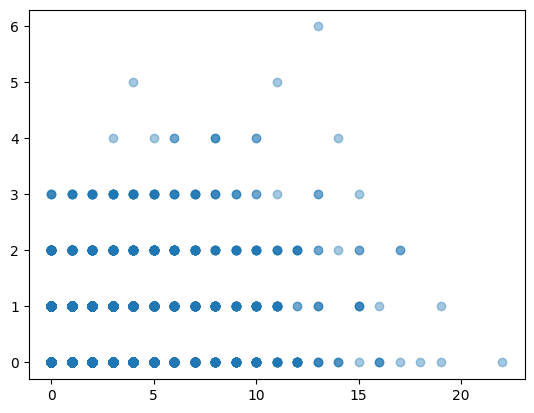

In [22]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['DUIS'], alpha=0.4)
pass

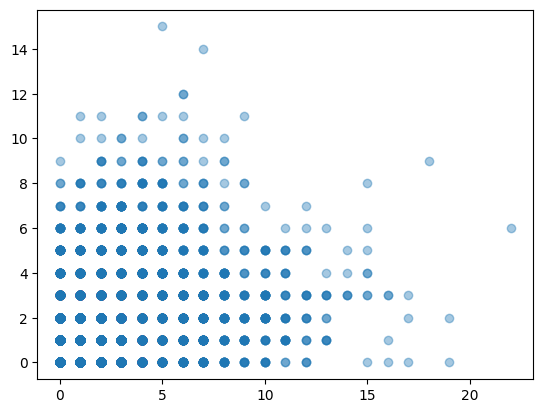

In [23]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['PAST_ACCIDENTS'], alpha=0.4)
pass

##Построим гистoграммы :

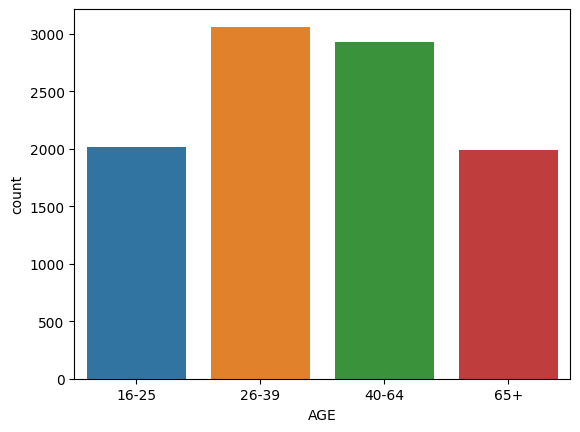

In [24]:
sns.countplot(x='AGE', data=data_raw)
pass

Замечаем, что больше всего страховку запрашивают люди в возрасте 26-39 лет

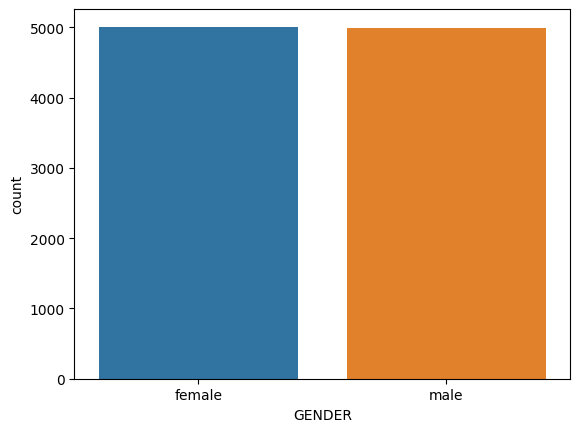

In [25]:
sns.countplot(x='GENDER', data=data_raw)
pass

Страховка нужна всем, как женщинам, так и мужчинам

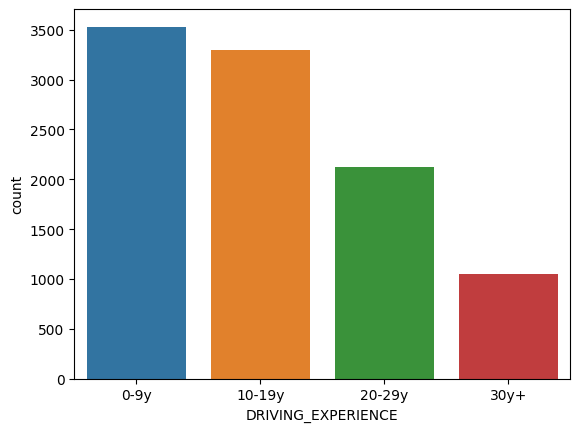

In [26]:
sns.countplot(x='DRIVING_EXPERIENCE', data=data_raw)
pass

Страховку чаще всего одобряют водителям с небольшим стажем

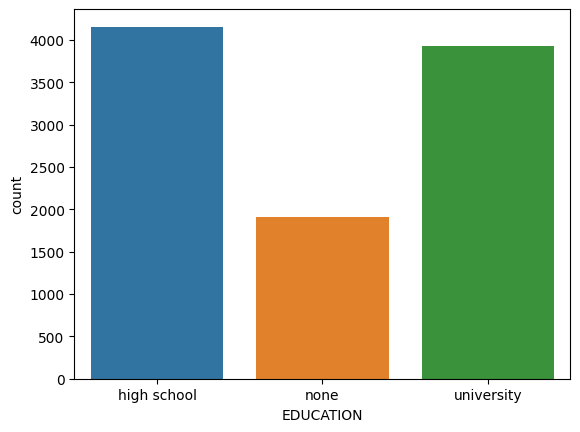

In [27]:
sns.countplot(x='EDUCATION', data=data_raw)
pass

Больше всего за страховкой обращаются люди с оконченным средним образованием.

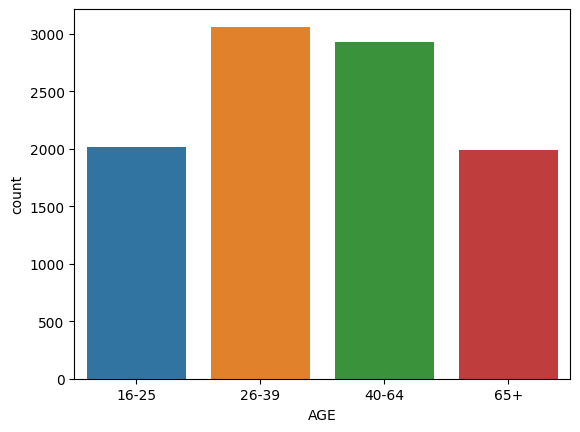

In [28]:
sns.countplot(x='AGE', data=data_raw)
pass

Видим, что больше всего за страховкой обращаются люди возраста 26-64 лет

<Axes: xlabel='DRIVING_EXPERIENCE', ylabel='OUTCOME'>

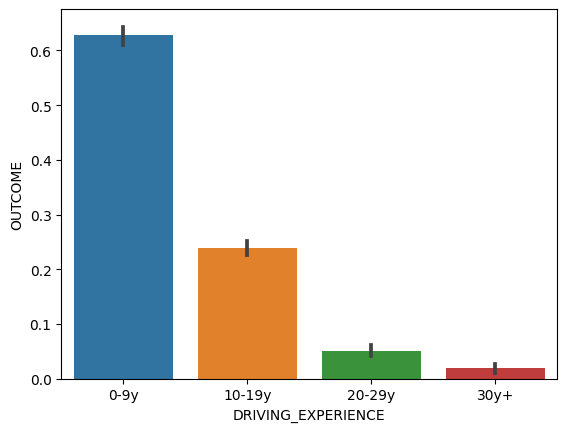

In [29]:
sns.barplot(data=data_raw, x="DRIVING_EXPERIENCE", y="OUTCOME")

Чаще страховку дают молодым водителям

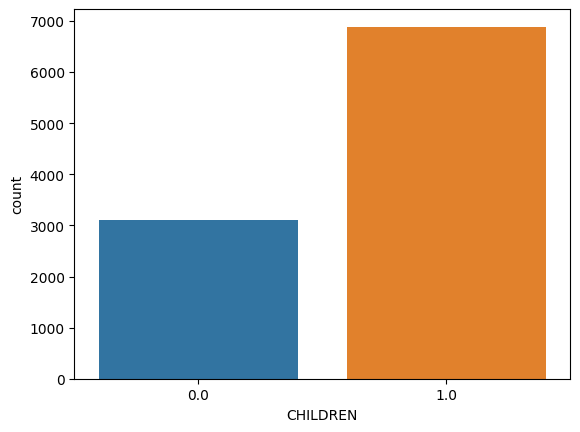

In [30]:
sns.countplot(x='CHILDREN', data=data_raw)
pass

Видим, что в страховке больше заинтересованы люди, у которых есть дети

## Заполнение пропущенных значений ##
Пропущенные значения в таблице представлены значениями `np.nan`.
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [31]:
data_raw.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

С пропущенными значениями надо что-то сделать. Заполним пропущенные значения медианной:

In [32]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

<ipython-input-32-dcd17f8fdec0>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)


Проверим заполненые значения:

In [33]:
data_raw.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Пропущенных значений больше нет

## Обработка категориальных признаков
Для дальнейшей обработки данных закодируем категориальные признаки с помощью числовых.

Для последующей нормализации признаков, нам необходимо закодировать категориальные признаки с помощью числовых. Заменим бинарные признаки на 0 и 1, а к небинарным применим метод бинаризации

In [34]:
AGE_dummies = pd.get_dummies(data_raw['AGE'])
DRIVING_EXPERIENCE_dummies = pd.get_dummies(data_raw['DRIVING_EXPERIENCE'])
EDUCATION_dummies = pd.get_dummies(data_raw['EDUCATION'])
INCOME_dummies = pd.get_dummies(data_raw['INCOME'])
data_raw['GENDER'] = pd.factorize(data_raw['GENDER'])[0]
data_raw['RACE'] = pd.factorize(data_raw['RACE'])[0]
data_raw['VEHICLE_YEAR'] = pd.factorize(data_raw['VEHICLE_YEAR'])[0]
data_raw['VEHICLE_TYPE'] = pd.factorize(data_raw['VEHICLE_TYPE'])[0]
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,0,0,0-9y,high school,upper class,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,16-25,1,0,0-9y,none,poverty,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,16-25,0,0,0-9y,high school,working class,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,16-25,1,0,0-9y,university,working class,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,26-39,1,0,10-19y,none,working class,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


Обработаем признаки "AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"

In [35]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(10000, 30)


,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,569520,0,0,0.629027,1.0,0,0.0,1.0,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,0.0,1,0.0,0.0,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,1.0,1,0.0,0.0,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,1.0,1,0.0,1.0,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,1.0,1,0.0,0.0,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


### Наличие выбросов

##### Числовые признаки:

In [36]:
data_raw['CREDIT_SCORE'].value_counts()

0.525033    982
0.428487      1
0.594531      1
0.396540      1
0.578306      1
           ... 
0.309272      1
0.847325      1
0.432080      1
0.527041      1
0.435225      1
Name: CREDIT_SCORE, Length: 9019, dtype: int64

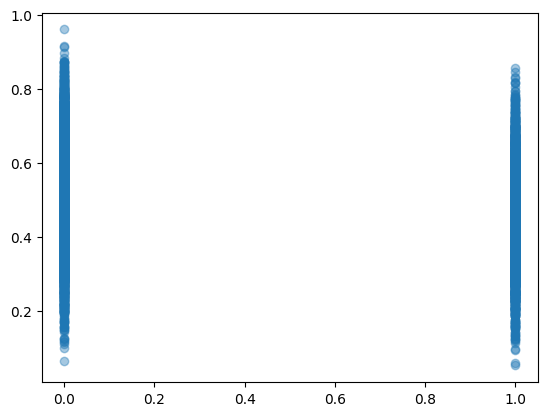

In [37]:
plt.scatter(data_raw['OUTCOME'], data_raw['CREDIT_SCORE'], alpha=0.4)
pass

In [38]:
data_raw['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [39]:
data_raw['MARRIED'].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [40]:
data_raw['CHILDREN'].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

In [41]:
data_raw['POSTAL_CODE'].value_counts()

10238    6940
32765    2456
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64

In [42]:
data_raw['ANNUAL_MILEAGE'].value_counts()

12000.0    2175
11000.0    1253
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
2000.0        2
22000.0       2
Name: ANNUAL_MILEAGE, dtype: int64

In [43]:
data_raw['SPEEDING_VIOLATIONS'].value_counts()

0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

In [44]:
data_raw['DUIS'].value_counts()

0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: DUIS, dtype: int64

In [45]:
data_raw['PAST_ACCIDENTS'].value_counts()

0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
14       1
15       1
Name: PAST_ACCIDENTS, dtype: int64

In [46]:
data_raw['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

## Нормализация признаков

Наиболее часто используют один из двух следующих способов:
- *приведение к отрезку $[0,1]$* - это линейное преобразование, приводящее все значения к заданному отрезку;


In [47]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500483,0.499000,0.098800,0.510612,0.697000,0.696700,0.498200,0.688800,0.117593,0.486300,...,0.3299,0.211900,0.105200,0.415700,0.191500,0.392800,0.213800,0.181400,0.433600,0.171200
std,0.290067,0.500024,0.298408,0.144117,0.459578,0.459707,0.500022,0.463008,0.231064,0.134082,...,0.4702,0.408675,0.306826,0.492867,0.393501,0.488397,0.410008,0.385369,0.495596,0.376702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249569,0.000000,0.000000,0.416714,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501739,0.000000,0.000000,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753968,1.000000,0.000000,0.610769,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,...,1.0000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Выбор признаков

Используем  все признаки кроме ID, так как он создается только для идентификации

In [48]:
X = data_normal.drop (['ID', 'OUTCOME'], axis=1)
y = data_raw['OUTCOME']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape
N_test,  _ = X_test.shape
N_train, N_test

(7500, 2500)

## Метод ближайших соседей

Попробуем обучить нашу модель с помощью метода `kNN`

In [50]:
#from sklearn.neighbors import KNeighborsClassifier
#knn_def = KNeighborsClassifier()
#knn_def.fit(X_train, y_train)
#err_tr = 100 * knn_def.score(X_train, y_train)
#err_te= 100 * knn_def.score(X_test, y_test)
#print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(err_tr, err_te))

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict=knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [53]:
err_test*100, err_train*100

(18.4, 14.853333333333332)

Получаем ошибку на тестовой выборке 18.4%, а на обучающей - 14.84%.

Увеличим число соседей до 20:

In [54]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [55]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict=knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [56]:
err_test*100, err_train*100

(17.8, 16.2)

Точность на тестовой выборке увеличилась, но уменьшилась на обучающей

##Метод Random Forest

Ошибка на обучающем наборе: 0.0002666666666666667
Ошибка на тестовом наборе: 0.1744


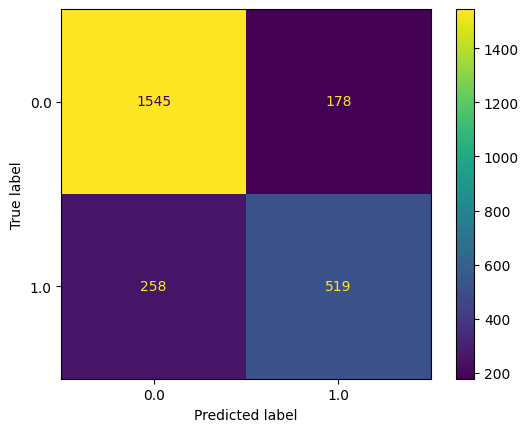

In [61]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000, random_state=42)
rf.fit(X_train, y_train)

y_train_predict = rf.predict(X_train)
y_test_predict = rf.predict(X_test)
err_train_rf = np.mean(y_train != y_train_predict)
err_test_rf  = np.mean(y_test  != y_test_predict)
print("Ошибка на обучающем наборе:", err_train_rf)
print("Ошибка на тестовом наборе:", err_test_rf)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

По результатам видно, что метод Random Forest дает более высокую точность на обучающей выборке, а на тестовой дает точно такую же, как в предыдущем методе, сравнивая с методом ближайших соседей, в данном случае для задачи классификации лучше использовать Random Forest

## Выводы

Как итог выполненной лабораторной рабоыт была решена задача
классификации. Анализируя данные, мы выявляли, будет получена страховка или нет. Обучение и классификация проводились с помощью метода ближайших k-соседей (рассмотрены случаи 10 и 20 соседей) и метода Random Forest. Значения ошибок получились достаточно большими, возможно,  в наступлении страхового случая доля случайности велика и предсказать наверняка, наступит такой случай или нет невозможно, то это объясняет данный процент ошибок. Также обратим внимание, что ошибка на тестовой выборке больше, чем на обучающей.

# Логистическая регрессия

Ошибка на обучающем наборе: 0.15386666666666668
Ошибка на тестовом наборе: 0.1556


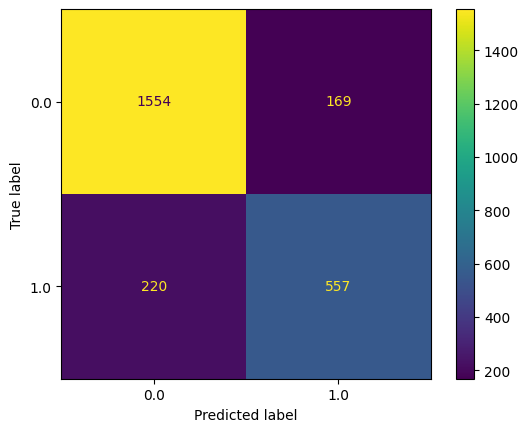

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(max_iter=4000)
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)
err_train_lr = np.mean(y_train != y_train_predict)
err_test_lr = np.mean(y_test != y_test_predict)
print("Ошибка на обучающем наборе:", err_train_lr)
print("Ошибка на тестовом наборе:", err_test_lr)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.show()

# Полносвязная нейронная сеть с 1 скрытым слоем

Ошибка на обучающем наборе: 0.11506666666666666
Ошибка на тестовом наборе: 0.1764


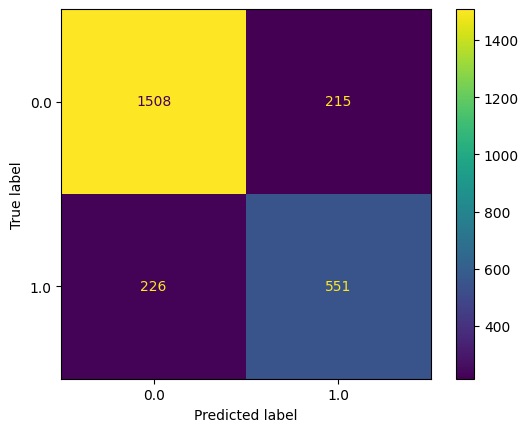

In [62]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_train_predict = mlp.predict(X_train)
y_test_predict = mlp.predict(X_test)
err_train_m = np.mean(y_train != y_train_predict)
err_test_m = np.mean(y_test != y_test_predict)


print("Ошибка на обучающем наборе:", err_train_m)
print("Ошибка на тестовом наборе:", err_test_m)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
disp.plot()

# Подбор гиперпараметров

In [63]:
from sklearn.metrics import accuracy_score

train_acc = []
train_err = []
test_acc = []
test_err = []
alpha_arr = np.logspace(-3, 2, 21)

for alpha in alpha_arr:
    model = MLPClassifier(alpha=alpha,
                          hidden_layer_sizes=(100,),
                          max_iter=100)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc.append(accuracy_score(y_train, y_train_pred))
    train_err.append(np.mean(y_train != y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    test_err.append(np.mean(y_test != y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

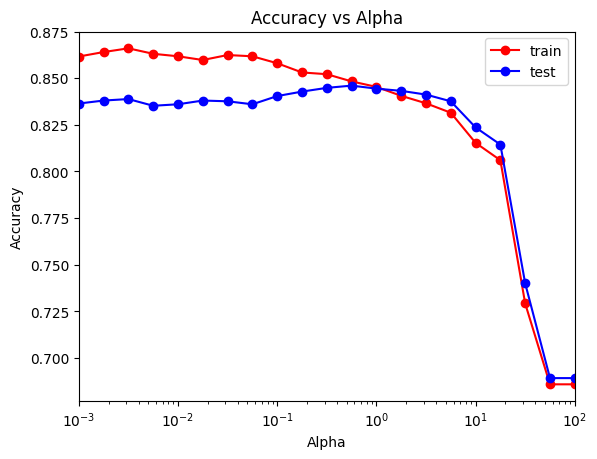

In [64]:
import matplotlib.pyplot as plt

plt.semilogx(alpha_arr, train_acc, "r-o", label="train")
plt.semilogx(alpha_arr, test_acc, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
pass

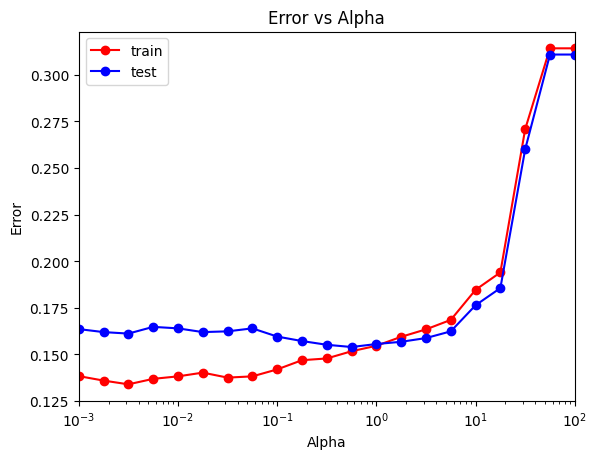

In [65]:
plt.semilogx(alpha_arr, train_err, "r-o", label="train")
plt.semilogx(alpha_arr, test_err, "b-o", label="test")
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs Alpha')
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.legend()
pass

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
    'hidden_layer_sizes': [(50), (60), (70), (80), (90), (100), (150)]
}

mlp = MLPClassifier(max_iter=100, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Наилучшие параметры:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Наилучшие параметры: {'alpha': 0.5, 'hidden_layer_sizes': 50}


Ошибка на обучающем наборе: 0.15053333333333332
Ошибка на тестовом наборе: 0.1556


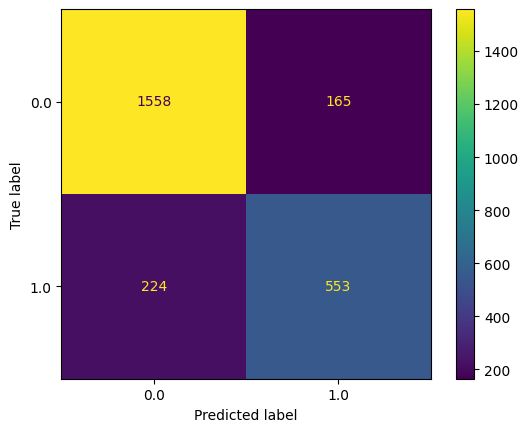

In [67]:
best_params = grid_search.best_params_
best_mlp = MLPClassifier(max_iter=1000, random_state=42, **best_params)
best_mlp.fit(X_train, y_train)

y_train_predict = best_mlp.predict(X_train)
y_test_predict = best_mlp.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)

print("Ошибка на обучающем наборе:", err_train)
print("Ошибка на тестовом наборе:", err_test)

cm = confusion_matrix(y_test, y_test_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_mlp.classes_)
disp.plot()
plt.show()

Проанализировав графики, можно прийти к выводу, что у нас не наблюдается ни недообучения, ни переобучения. Так как графики Error/Accuracy для train/test похожи, делаем вывод об одиноковом распределении тренировочных и тестовых данных.

Итого получилось:

Логистическая регрессия - Ошибка на обучающем наборе: 0.15386666666666668
Ошибка на тестовом наборе: 0.1556

Random Forest - Ошибка на обучающем наборе: 0.0002666666666666667
Ошибка на тестовом наборе: 0.1744

MLP - Ошибка на обучающем наборе: 0.11506666666666666
Ошибка на тестовом наборе: 0.1764

Хуже всего на обучающем наборе себя показала логистическая регрессия. MLP чуть получше, а RF показал самые меньшие значения ошибки.

На тестовом наборе лучше всех себя показала логистическая регрессия, а Random Forest и MLP имеют схожие значения, однако MLP показал себя чуть хуже.

Так же можем сказать, что ошибка на тестовой выборке больше, чем на обучающей.